In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dgpsi import gp, dgp, kernel, combine, emulator
plt.style.use("ggplot")
rng = np.random.RandomState(123)

## Data generation

In [2]:
# Data generation function
def func(x):
    y1 = (np.sin(7.5*x)+1)/2
    return 2/3*np.sin(2*(2*y1-1))+4/3*np.exp(-30*(2*(2*y1-1))**2)-1/3  

N = 5000  # Number of training observations
X = rng.rand(N, 1) * 2 - 1  # input values
Y = func(X) + 0.05 * rng.randn(N, 1)  # Noisy output values

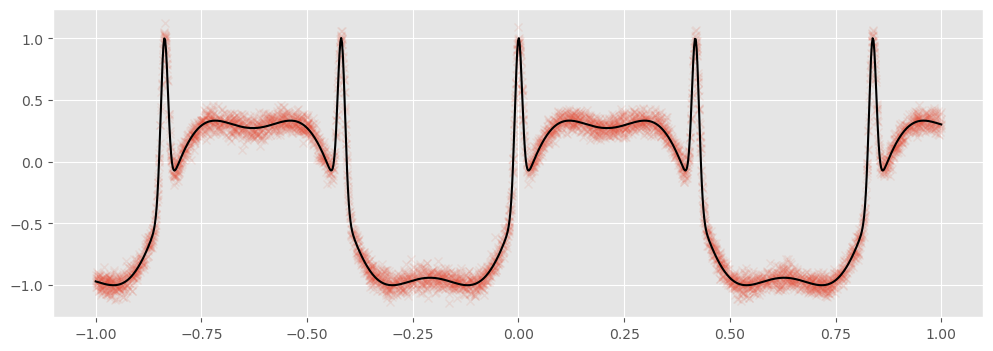

In [3]:
# Plot the generation function and the noisy data points
plt.figure(figsize=(12, 4))
plt.plot(X, Y, "x", alpha=0.1)
Xt = np.linspace(-1., 1., 1000)[:, None]
Yt = func(Xt)
plt.plot(Xt, Yt, c="k")

## DGP emulation with Vecchia approximation

To implement the DGP emulation with the Vecchia approximation, one just needs to turn on `vecchia` argument.

In [4]:
layer1=[kernel(length=np.array([0.5]),name='sexp')]
layer2=[kernel(length=np.array([0.5]),name='sexp', nugget_est=True, scale_est=True, connect = np.arange(1))]
all_layer=combine(layer1,layer2)
m_dgp=dgp(X,Y,all_layer,vecchia=True)

In [5]:
m_dgp.train(N=100) #training

Iteration 100: Layer 2: 100%|██████████| 100/100 [03:27<00:00,  2.08s/it]


In [6]:
final_layer_obj=m_dgp.estimate()
emu=emulator(final_layer_obj)

In [7]:
#prediction
z=np.linspace(-1,1,2000)[:,None].reshape(-1,1)
mu_dgp,var_dgp=emu.predict(z, method='mean_var', m=200) #choose 200 nearest neighbours for better predictions

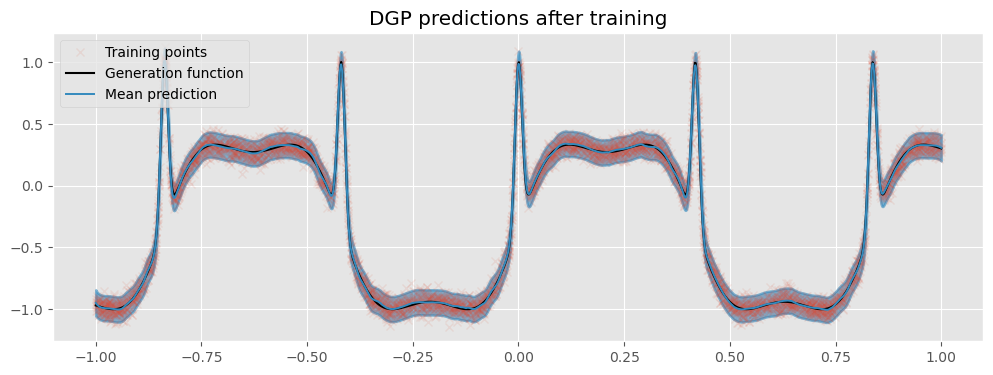

In [9]:
plt.figure(figsize=(12, 4))
plt.title('DGP predictions after training')
plt.plot(X, Y, "x", label="Training points", alpha=0.1)
plt.plot(Xt, Yt, c="k", lw=1.5, label="Generation function")
(line,) = plt.plot(z, mu_dgp, lw=1.4, label="Mean prediction")
col = line.get_color()
plt.fill_between(
    z[:, 0],
    (mu_dgp - 2 * var_dgp ** 0.5)[:, 0],
    (mu_dgp + 2 * var_dgp ** 0.5)[:, 0],
    color=col,
    alpha=0.6,
    lw=1.75,
)
plt.legend(loc="upper left")

## GP emulation with Vecchia approximation

In [10]:
m_gp=gp(X, Y, kernel(length=np.array([1.]),name='sexp', nugget_est=True, scale_est=True), vecchia=True)

In [11]:
m_gp.train() #training

In [12]:
#prediction
z=np.linspace(-1,1,2000)[:,None].reshape(-1,1)
mu_gp,var_gp=m_gp.predict(z, method='mean_var', m=200)

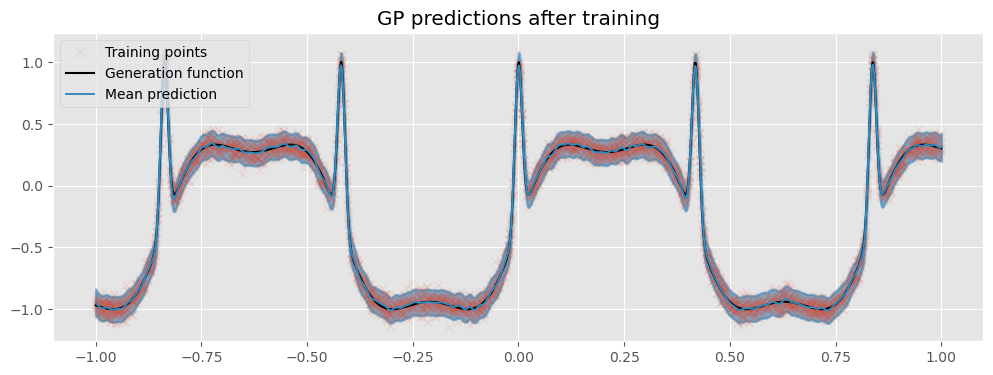

In [13]:
plt.figure(figsize=(12, 4))
plt.title('GP predictions after training')
plt.plot(X, Y, "x", label="Training points", alpha=0.1)
plt.plot(Xt, Yt, c="k", lw=1.5, label="Generation function")
(line,) = plt.plot(z, mu_gp, lw=1.4, label="Mean prediction")
col = line.get_color()
plt.fill_between(
    z[:, 0],
    (mu_gp - 2 * var_gp ** 0.5)[:, 0],
    (mu_gp + 2 * var_gp ** 0.5)[:, 0],
    color=col,
    alpha=0.6,
    lw=1.75,
)
plt.legend(loc="upper left")